# Carte Carrington

- synoptic map https://cesam.lam.fr/lascomission/Lascomission/synoptic_and_carrington_maps.html

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '..')
from module import carrington, toSunpyMap

In [3]:
map = toSunpyMap('../data/carrington_test_data/2022APR/imoa_06563_l1_20220429_09503596_emi1.fts.bz2',center_disk=True)

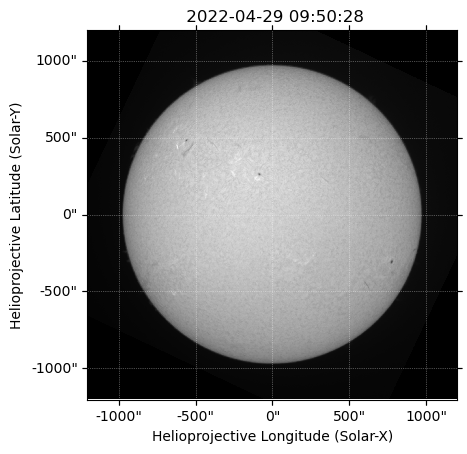

In [4]:
map.plot();

In [5]:
carr = carrington('../data/carrington_test_data/2022APR/imoa_06563_l1_20220429_09503596_emi1.fts.bz2', flat=True, center=True)

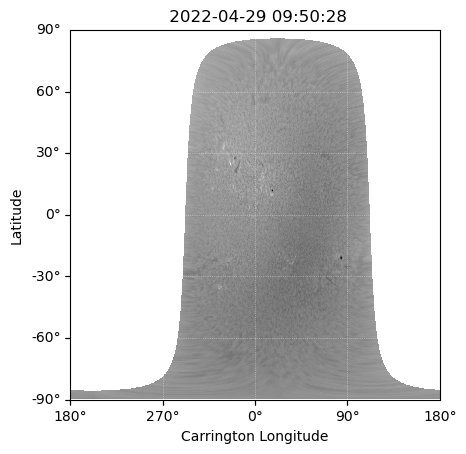

In [6]:
carr.plot();

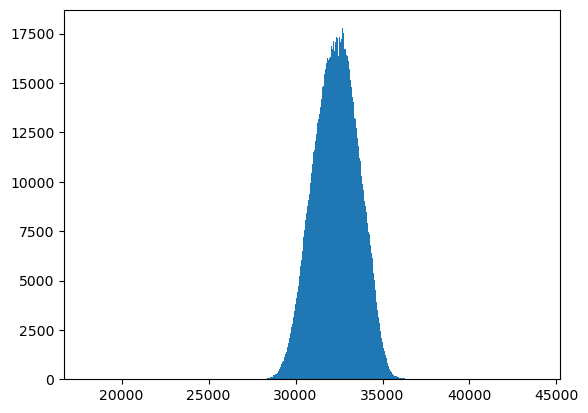

In [7]:
plt.hist(carr.data.flatten(), bins='auto');

In [8]:
folder = '../data/carrington_test_data/1/'

In [9]:
carrington_list = []
for filename in os.listdir(folder):
    carrington_list.append(carrington(folder + filename, flat=True, center=True))

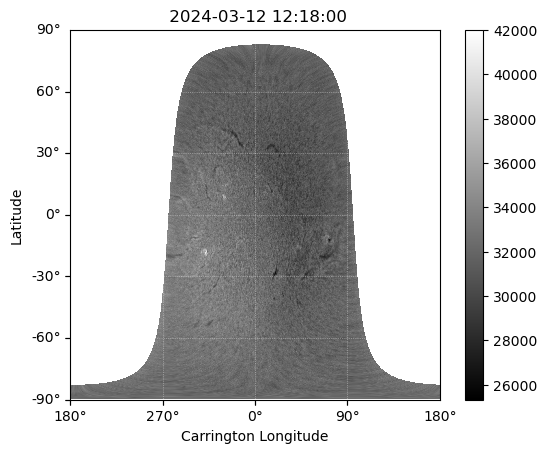

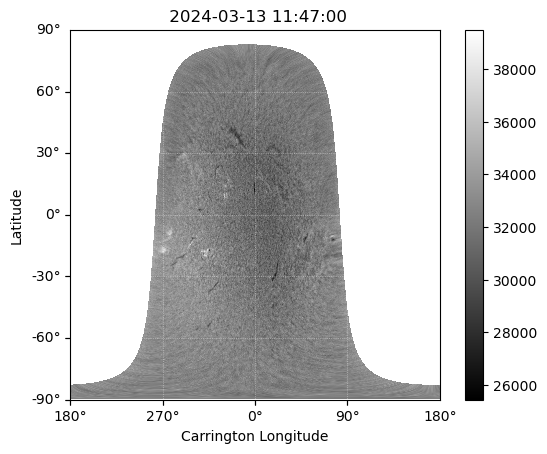

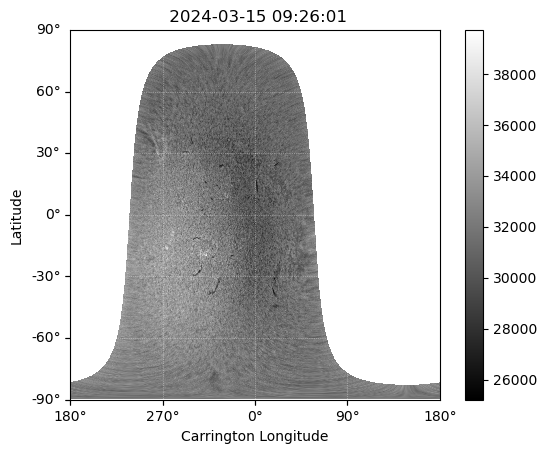

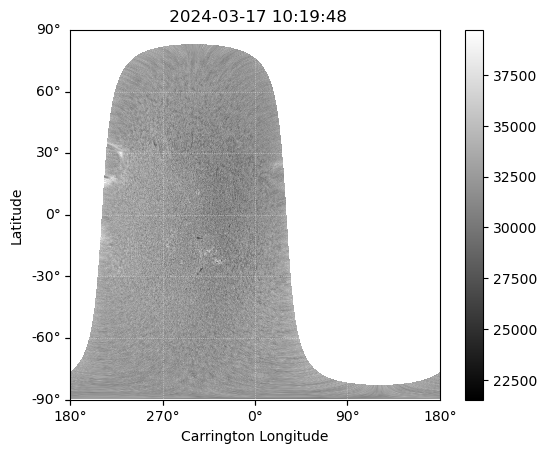

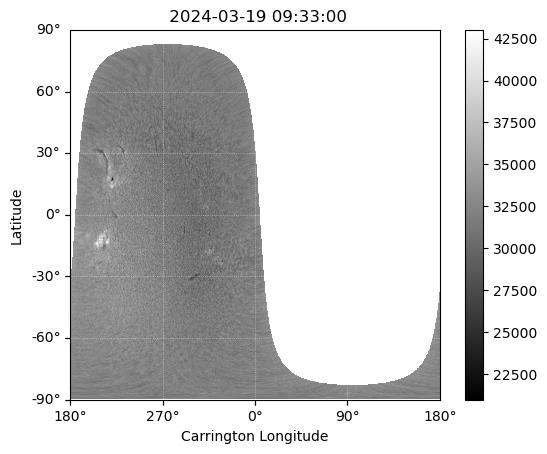

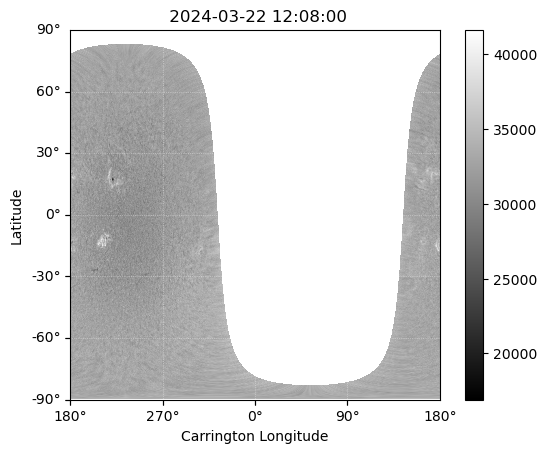

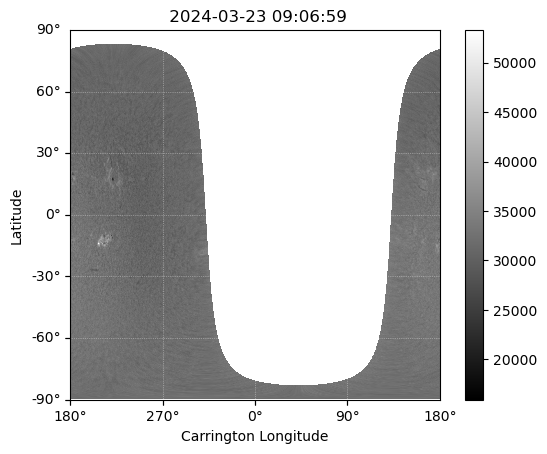

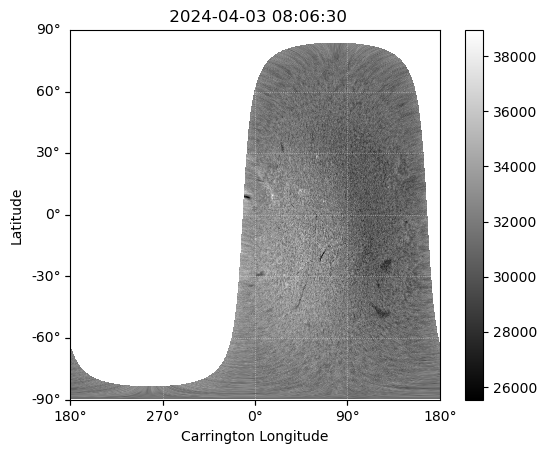

In [10]:
for carr in carrington_list:
    fig = plt.figure()
    ax = fig.add_subplot(projection=carr)
    im = carr.plot(axes=ax)
    plt.colorbar(im, ax=ax)

In [11]:
for carr in carrington_list:
    print((np.nanmedian(carr.data)))

32014.393306481077
32423.071991519915
31877.693044344338
32328.6386305314
32030.786144470017
32714.46034424111
31857.151797745915
31765.350476298023


In [12]:
carrington_list.sort(key=lambda x: x.carrington_longitude.deg)

In [13]:
carr_longs = []
for carr in carrington_list:
    idx = int((carr.carrington_longitude.deg)*carr.data.shape[1]/360)
    carr_longs.append(idx)

In [14]:
import numpy as np

img = np.full(carrington_list[0].data.shape, np.nan)
for idx in range(len(carrington_list)):
    if idx==0:
        start_index = int(np.floor(carr_longs[0] - (2048-carr_longs[-1]+carr_longs[0])/2))
    else:
        start_index = end_index

    if idx==len(carrington_list)-1:
        end_index = int(np.ceil(carr_longs[-1] + (2048-carr_longs[-1]+carr_longs[0])/2))
    else:
        end_index = int(np.ceil((carr_longs[idx]+carr_longs[idx+1])/2))
    
    if  start_index < 0:
        img[:,start_index+2048:] = np.roll(carrington_list[idx].data, 1024, axis = 1)[:,start_index+2048:]
        img[:,:end_index] = np.roll(carrington_list[idx].data, 1024, axis = 1)[:,:end_index]
        
    elif start_index > end_index:
        img[:,start_index:] = np.roll(carrington_list[idx].data, 1024, axis = 1)[:,start_index:]
        img[:,:end_index] = np.roll(carrington_list[idx].data, 1024, axis = 1)[:,:end_index]
        
    else:
        img[:,start_index:end_index] = np.roll(carrington_list[idx].data, 1024, axis = 1)[:,start_index:end_index]

img = np.roll(img, 1024, axis = 1)

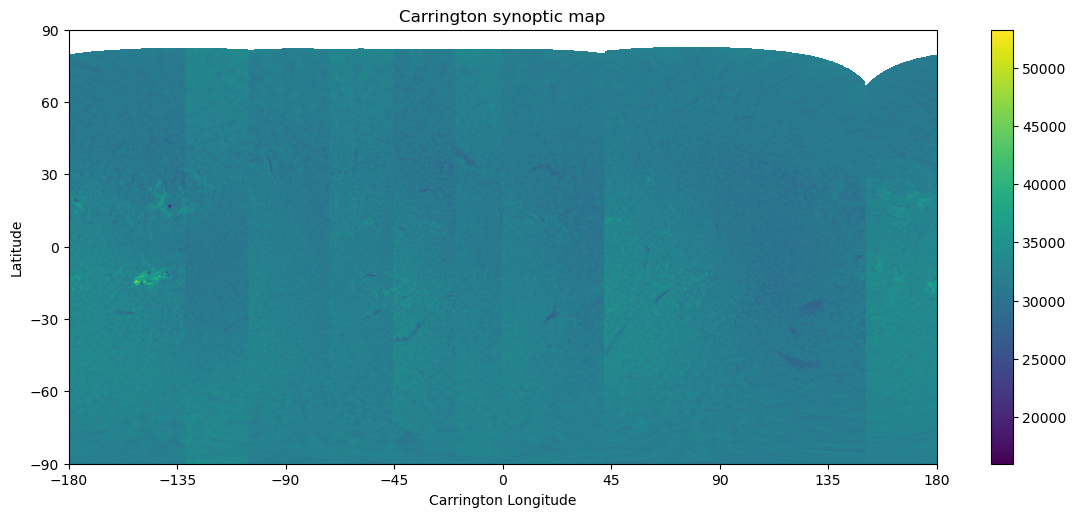

In [15]:
plt.figure(figsize=(14,14))

im = plt.imshow(img, origin='lower', extent=[-180,180,-90,90])

plt.colorbar(im, shrink=0.403)

 
plt.xticks(np.arange(-180, 181, 45))
plt.yticks(np.arange(-90, 91, 30))
 
plt.axis()

plt.xlabel('Carrington Longitude');
plt.ylabel('Latitude');

plt.title('Carrington synoptic map');


### v2

In [89]:
img = np.full(carrington_list[0].data.shape, np.nan)
for idx in range(len(carrington_list)):

    left  = np.roll(carrington_list[idx].data, 1024, axis = 1)
    right = np.roll(carrington_list[idx+1].data, 1024, axis = 1)
    
    line = np.concatenate((
        np.full((carr_longs[idx]),np.nan),
        np.linspace(1,0, carr_longs[idx+1]-carr_longs[idx]),
        np.full((2048-carr_longs[idx+1]),np.nan),
        ))
    mask_left = np.tile(line, (img.shape[0],1))
    mask_left[:,carr_longs[idx]:carr_longs[idx+1]][np.isnan(right[:,carr_longs[idx]:carr_longs[idx+1]])]=1
    
    mask_right = np.tile(1-line, (img.shape[0],1))
    mask_right[:,carr_longs[idx]:carr_longs[idx+1]][np.isnan(left[:,carr_longs[idx]:carr_longs[idx+1]])]=1
    
    img = np.nansum([left*mask_left, right*mask_right, img], axis=0)
    
img = np.roll(img, 1024, axis = 1)

IndexError: list index out of range

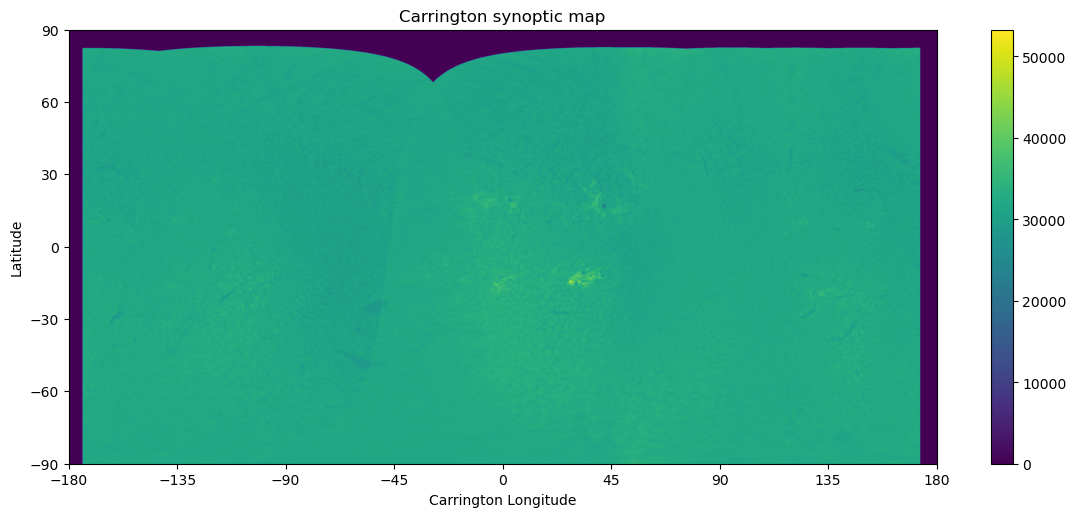

In [91]:
plt.figure(figsize=(14,14))

im = plt.imshow(img, origin='lower', extent=[-180,180,-90,90])

plt.colorbar(im, shrink=0.403)
 
plt.xticks(np.arange(-180, 181, 45))
plt.yticks(np.arange(-90, 91, 30))
 
plt.axis()

plt.xlabel('Carrington Longitude');
plt.ylabel('Latitude');

plt.title('Carrington synoptic map');